In [1]:
import multimin as mn
from IPython.display import Markdown, display

Welcome to MultiMin v0.10.2. ¡Al infinito y más allá!


In [2]:
import numpy as np
import multimin as mn

# Define parameters for 2 Gaussian components
weights = [0.5, 0.5]
mus = [[1.0, 0.5, -0.5], [1.0, -0.5, +0.5]]
sigmas = [[1, 1.2, 2.3], [0.8, 0.2, 3.3]]
deg = np.pi/180
angles = [
    [10*deg, 30*deg, 20*deg],
    [-20*deg, 0*deg, 30*deg],
] 

# Calculate covariance matrices from rotation angles
Sigmas = mn.Stats.calc_covariance_from_rotation(sigmas, angles)

# Create the MoG object
MoG = mn.MixtureOfGaussians(mus=mus, weights=weights, Sigmas=Sigmas)

In [3]:
np.random.seed(1)
sample = MoG.rvs(5000)

MixtureOfGaussians.rvs executed in 0.33414387702941895 seconds


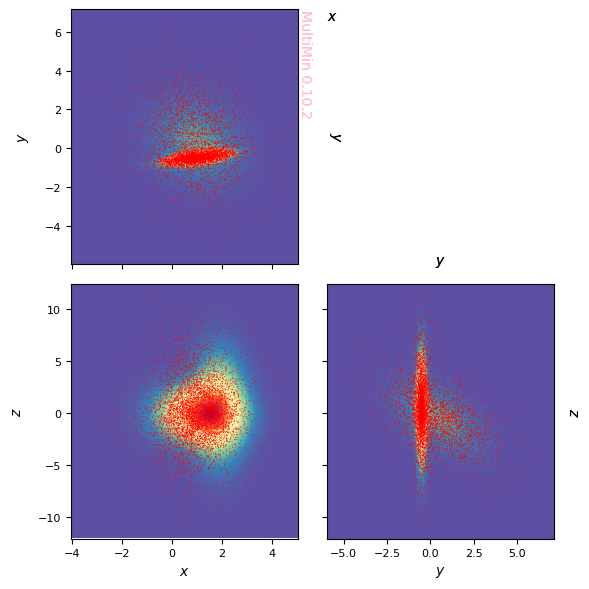

In [9]:
import matplotlib.pyplot as plt

# Define properties labels
properties = dict(
    x=dict(label=r"$x$", range=None),
    y=dict(label=r"$y$", range=None),
    z=dict(label=r"$z$", range=None),
)

# Plot the density plot
G = mn.MultiPlot(properties, figsize=3)

sargs = dict(s=0.5,edgecolor='None',color='r')
scatter = G.sample_scatter(sample,**sargs)

pargs=dict(cmap='Spectral_r')
pdf = G.mog_pdf(MoG,**pargs)

In [8]:
# Initialize the fitter
F = mn.FitMoG(data=sample, ngauss=2)

# Run the fit (using progress="text" for better convergence on complex models)
F.fit_data(progress="text")

Loading a FitMoG object.
Number of gaussians: 2
Number of variables: 3
Number of dimensions: 6
Number of samples: 5000
Log-likelihood per point (-log L/N): 11.382387380908426
Iterations:
Iter 0:
	Vars: [0, 0, 2.2, 1.8, -2.3, 0.95, -0.7, 1.6, -1.6, -1.4, -0.082, -2.2, -2.7, -0.71, 0.99, 0.5, -0.15, 1.3, 0.77, 0.26]
	LogL/N: 5.702975752643309
Iter 1:
	Vars: [-1.1, 0.008, 1, 1.1, -0.89, 0.98, -0.47, 0.36, -1.8, -1.4, -1.4, -2.2, -3.5, -0.65, -0.33, 0.039, -1.3, 1.1, 0.2, 0.026]
	LogL/N: 5.027930729181173
Iter 2:
	Vars: [-0.46, 0.0093, 0.9, 0.79, -0.65, 1, -0.47, 0.59, -2.2, -1.7, -1.3, -2.4, -3.6, -0.71, -0.32, 0.18, -1.2, 1.2, 0.016, -0.029]
	LogL/N: 4.9244515691859165
Iter 3:
	Vars: [-0.2, 0.0096, 0.93, 0.6, -0.52, 1, -0.48, 0.61, -2.2, -1.7, -1.3, -2.4, -3.7, -0.7, -0.39, 0.23, -1.2, 1.2, -0.015, -0.037]
	LogL/N: 4.914791061413522
Iter 4:
	Vars: [-0.095, 0.0095, 0.95, 0.54, -0.48, 1, -0.48, 0.62, -2.2, -1.7, -1.3, -2.4, -3.7, -0.7, -0.42, 0.24, -1.2, 1.2, -0.018, -0.036]
	LogL/N: 4.913

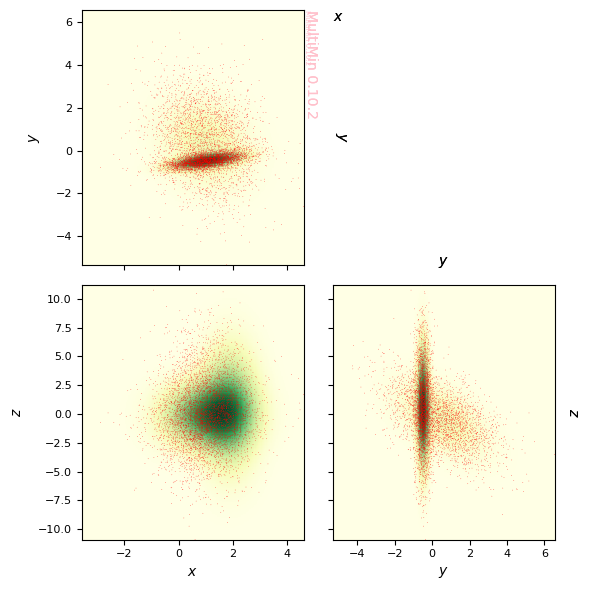

In [10]:
# Plot the fit result (properties accepts the same dict as DensityPlot, or a list of names)
G = F.plot_fit(
    properties=properties,
    pargs=dict(cmap='YlGn'),
    sargs=dict(s=0.2, edgecolor='None', color='r'),
    figsize=3
)

In [11]:
F.mog.tabulate(sort_by='weight')

,w,mu_1,mu_2,mu_3,sigma_1,sigma_2,sigma_3,rho_12,rho_13,rho_23
component,,,,,,,,,,
2,0.509108,1.019245,-0.480997,0.618821,0.794906,0.245786,3.327537,0.539417,-0.008936,-0.017769
1,0.490892,0.957687,0.517584,-0.463392,1.039489,1.538029,2.116544,-0.209695,0.121184,-0.527142


In [12]:
code, mog = F.mog.get_function()

from multimin import Util

def mog(X):

    mu1_1 = 0.957687
    mu1_2 = 0.517584
    mu1_3 = -0.463392
    mu1 = [mu1_1, mu1_2, mu1_3]
    Sigma1 = [[1.080538, -0.335252, 0.266619], [-0.335252, 2.365532, -1.716008], [0.266619, -1.716008, 4.479757]]
    n1 = Util.nmd(X, mu1, Sigma1)

    mu2_1 = 1.019245
    mu2_2 = -0.480997
    mu2_3 = 0.618821
    mu2 = [mu2_1, mu2_2, mu2_3]
    Sigma2 = [[0.631876, 0.10539, -0.023637], [0.10539, 0.060411, -0.014533], [-0.023637, -0.014533, 11.072503]]
    n2 = Util.nmd(X, mu2, Sigma2)

    w1 = 0.490892
    w2 = 0.509108

    return (
        w1*n1
        + w2*n2
    )


In [13]:
mog([1.0, 0.5, -0.5])

np.float64(0.011073778538468838)

In [14]:
latex_str, _ = F.mog.get_function(print_code=False, type='latex', decimals=4)
display(Markdown(latex_str))

$$f(\mathbf{x}) = w_1 \, \mathcal{N}(\mathbf{x}; \boldsymbol{\mu}_1, \mathbf{\Sigma}_1) + w_2 \, \mathcal{N}(\mathbf{x}; \boldsymbol{\mu}_2, \mathbf{\Sigma}_2)$$

where

$$w_1 = 0.4909$$
$$\boldsymbol{\mu}_1 = \left( \begin{array}{c} 0.9577 \\ 0.5176 \\ -0.4634 \end{array}\right)$$
$$\mathbf{\Sigma}_1 = \left( \begin{array}{ccc} 1.0805 & -0.3353 & 0.2666 \\ -0.3353 & 2.3655 & -1.716 \\ 0.2666 & -1.716 & 4.4798 \end{array}\right)$$

$$w_2 = 0.5091$$
$$\boldsymbol{\mu}_2 = \left( \begin{array}{c} 1.0192 \\ -0.481 \\ 0.6188 \end{array}\right)$$
$$\mathbf{\Sigma}_2 = \left( \begin{array}{ccc} 0.6319 & 0.1054 & -0.0236 \\ 0.1054 & 0.0604 & -0.0145 \\ -0.0236 & -0.0145 & 11.0725 \end{array}\right)$$

Here the normal distribution is defined as:

$$\mathcal{N}(\mathbf{x}; \boldsymbol{\mu}, \mathbf{\Sigma}) = \frac{1}{\sqrt{(2\pi)^{{k}} \det \mathbf{\Sigma}}} \exp\left[-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^{\top} \mathbf{\Sigma}^{{-1}} (\mathbf{x}-\boldsymbol{\mu})\right]$$

MixtureOfGaussians.rvs executed in 0.3416900634765625 seconds
Loading a FitMoG object.
Number of gaussians: 2
Number of variables: 1
Number of dimensions: 2
Number of samples: 5000
Domain: [[0, 1]]
Log-likelihood per point (-log L/N): 0.004669001935952545
Iterations:
Iter 0:
	Vars: [0.71, -0.71, 0.09, 0.93, -4.2, -4.2]
	LogL/N: 0.08138432714654614
Iter 1:
	Vars: [0.35, -0.35, 0.18, 0.84, -4.1, -4.1]
	LogL/N: -0.09865510572483369
Iter 2:
	Vars: [0.11, -0.11, 0.19, 0.81, -4.2, -4.1]
	LogL/N: -0.10866579656521774
Iter 3:
	Vars: [0.11, -0.1, 0.19, 0.81, -4.2, -4.1]
	LogL/N: -0.11024931671179565
Iter 4:
	Vars: [0.083, -0.081, 0.18, 0.79, -4.3, -4.1]
	LogL/N: -0.11566352208726935
Iter 5:
	Vars: [0.058, -0.055, 0.18, 0.78, -4.4, -4.2]
	LogL/N: -0.12445558953283098
Iter 6:
	Vars: [0.047, -0.044, 0.2, 0.77, -4.6, -4.2]
	LogL/N: -0.1317068738814128
Iter 7:
	Vars: [0.053, -0.05, 0.2, 0.79, -4.6, -4.2]
	LogL/N: -0.13409036223642562
Iter 8:
	Vars: [0.052, -0.049, 0.2, 0.79, -4.6, -4.2]
	LogL/N: -0.

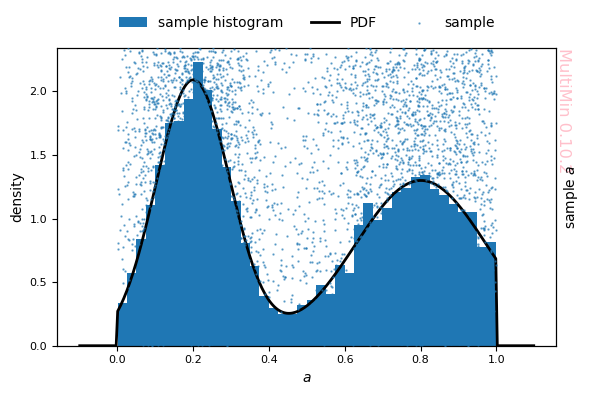

In [20]:
import numpy as np
import multimin as mn

# Truncated mixture of 2 Gaussians on [0, 1]
MoG_1d = mn.MixtureOfGaussians(
    mus=[0.2, 0.8],
    weights=[0.5, 0.5],
    Sigmas=[0.01, 0.03],
    domain=[[0, 1]],
)
np.random.seed(1)
data_1d = MoG_1d.rvs(5000)

# Fit with same domain so likelihood and means respect [0, 1]
F_1d = mn.FitMoG(data=data_1d, ngauss=2, domain=[[0, 1]])
F_1d.fit_data(progress="text")
G = F_1d.plot_fit(hargs=dict(bins=40), sargs=dict(s=0.5, alpha=0.6),figsize=4)

In [21]:
function, mog = F_1d.mog.get_function()

import numpy as np
from multimin import Util

def mog(X):

    a = 0.0
    b = 1.0

    mu1_1 = 0.200467
    sigma1_1 = 0.009683
    n1 = Util.tnmd(X, mu1_1, sigma1_1, a, b)

    mu2_1 = 0.801063
    sigma2_1 = 0.030392
    n2 = Util.tnmd(X, mu2_1, sigma2_1, a, b)

    w1 = 0.504151
    w2 = 0.495849

    return (
        w1*n1
        + w2*n2
    )


In [22]:
mog(0.5), mog(-0.2)

(0.3128645172339761, 0.0)

In [23]:
function_str, _ = F_1d.mog.get_function(print_code=False, type='latex')
display(Markdown(function_str))

Finite domain. The following variables are truncated (the rest are unbounded):

- Variable $x_{1}$ (index 1): domain $[0.0, 1.0]$.

Truncation region: $A_T = \{\tilde{U} \in \mathbb{R}^k : a_i \le \tilde{U}_i \le b_i \;\forall i \in T\}$, with $T$ the set of truncated indices.

$$f(x) = w_1 \, \mathcal{TN}(x; \mu_{1}, \sigma_{1}, a, b) + w_2 \, \mathcal{TN}(x; \mu_{2}, \sigma_{2}, a, b)$$

where

$$w_1 = 0.504151,\quad \mu_{1} = 0.200467,\quad \sigma_{1}^2 = 0.009683,\quad a = 0.0,\quad b = 1.0$$

$$w_2 = 0.495849,\quad \mu_{2} = 0.801063,\quad \sigma_{2}^2 = 0.030392,\quad a = 0.0,\quad b = 1.0$$

Truncated normal. The unbounded normal is

$$\mathcal{N}(x; \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right).$$

The truncation region is $A_T = \{\tilde{U} \in \mathbb{R}^k : a_i \le \tilde{U}_i \le b_i \;\forall i \in T\}$. The partially truncated normal is

$$\mathcal{TN}_T(\tilde{U}; \tilde{\mu}, \Sigma, \mathbf{a}_T, \mathbf{b}_T) = \frac{\mathcal{N}(\tilde{U}; \tilde{\mu}, \Sigma) \, \mathbf{1}_{A_T}(\tilde{U})}{Z_T(\tilde{\mu}, \Sigma, \mathbf{a}_T, \mathbf{b}_T)},$$

where $\mathbf{1}_{A_T}$ is the indicator of $A_T$ and the normalization constant is

$$Z_T(\tilde{\mu}, \Sigma, \mathbf{a}_T, \mathbf{b}_T) = \int_{A_T} \mathcal{N}(\tilde{T}; \tilde{\mu}, \Sigma) \, d\tilde{T} = \mathbb{P}_{\tilde{T} \sim \mathcal{N}(\tilde{\mu},\Sigma)}(\tilde{T} \in A_T).$$